
Fetching and forecasting BTC-INR...


[*********************100%***********************]  1 of 1 completed


Evaluation Metrics for BTC-INR:
MAE: 292617.89
MSE: 163874577313.01
RMSE: 404814.25


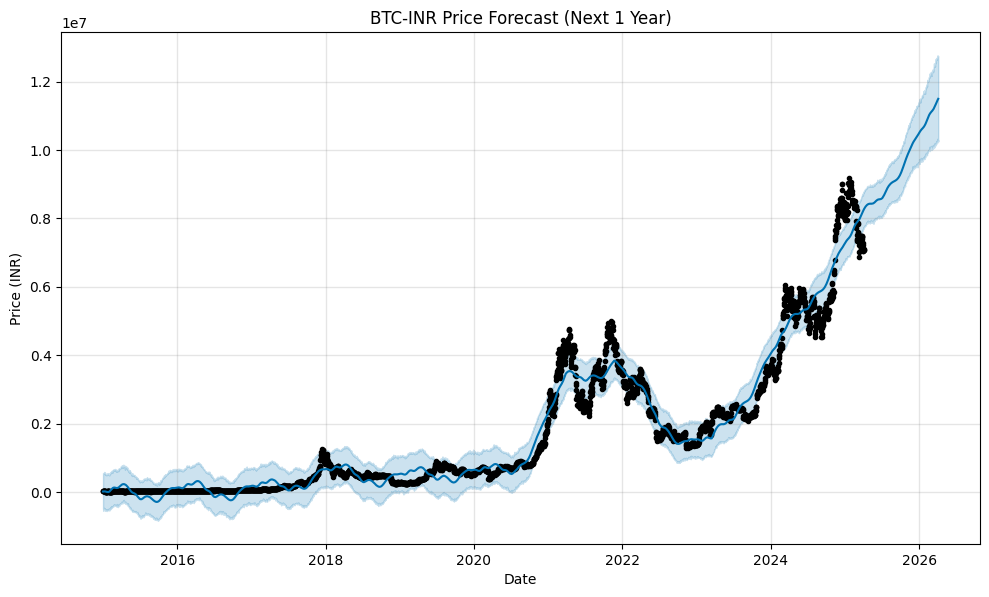


Fetching and forecasting ETH-INR...


[*********************100%***********************]  1 of 1 completed


Evaluation Metrics for ETH-INR:
MAE: 19712.55
MSE: 826910291.91
RMSE: 28756.05


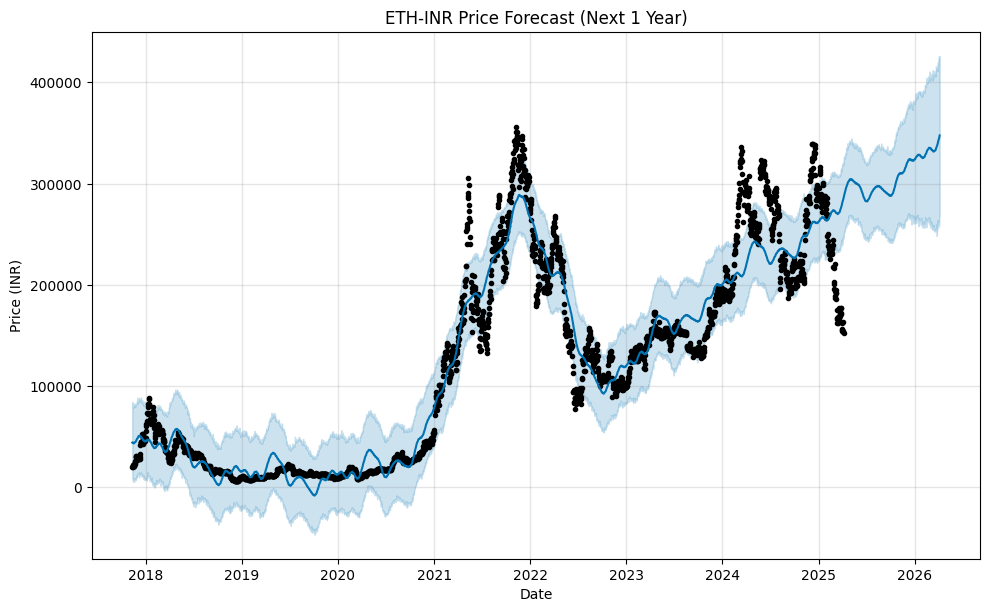


Fetching and forecasting LTC-INR...


[*********************100%***********************]  1 of 1 completed


Evaluation Metrics for LTC-INR:
MAE: 1124.81
MSE: 2882890.43
RMSE: 1697.91


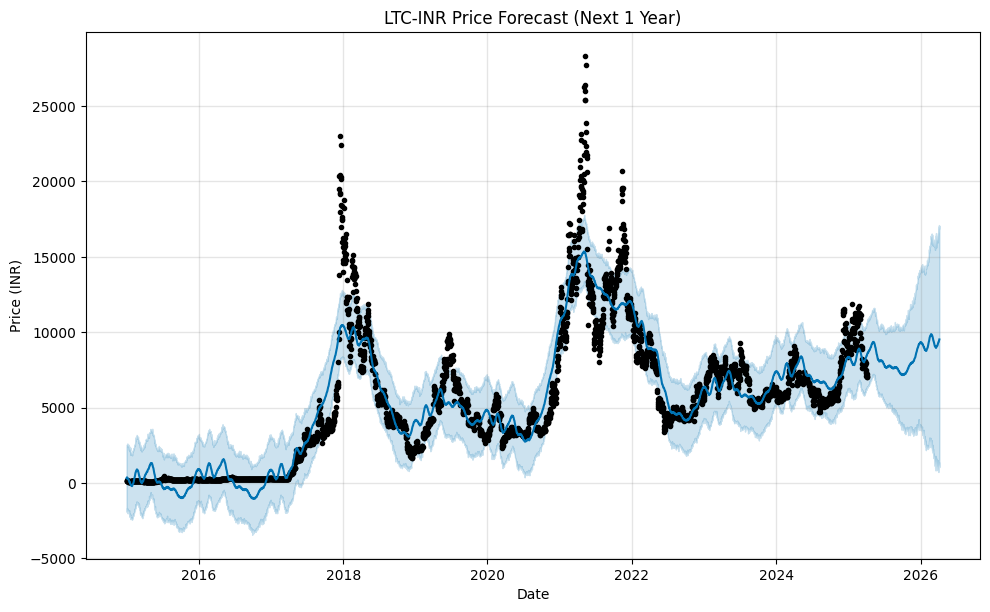

In [46]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Function to fetch data, clean it, train model, forecast, and evaluate
def forecast_crypto(ticker):
    print(f"\nFetching and forecasting {ticker}...")

    # Fetch historical data
    df = yf.download(ticker, start='2015-01-01', end='2025-04-06',multi_level_index=False)
    df.reset_index(inplace=True)
    # Use only Date and Close columns
    df = df[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

    # Drop rows with NaN
    df.dropna(inplace=True)

    # Ensure 'ds' is datetime and 'y' is float
    df['ds'] = pd.to_datetime(df['ds'])
    df['y'] = pd.to_numeric(df['y'], errors='coerce')
    df.dropna(inplace=True)

    # Fit Prophet model
    model = Prophet(daily_seasonality=True)
    model.fit(df)

    # Forecast next 365 days
    future = model.make_future_dataframe(periods=365)
    forecast = model.predict(future)

    # Evaluate the model
    # Use only the dates that are in both the original data and the forecast
    actual = df.set_index('ds')['y']
    predicted = forecast.set_index('ds').loc[actual.index]['yhat']

    mae = mean_absolute_error(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)

    print(f"Evaluation Metrics for {ticker}:")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")

    # Plot
    fig = model.plot(forecast)
    plt.title(f'{ticker} Price Forecast (Next 1 Year)')
    plt.xlabel('Date')
    plt.ylabel('Price (INR)')
    plt.grid(True)
    plt.show()

# Run for BTC, ETH, LTC
forecast_crypto('BTC-INR')
forecast_crypto('ETH-INR')
forecast_crypto('LTC-INR')

[*********************100%***********************]  1 of 1 completed


📈 Forecasting with LSTM for: BTC-INR


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step
📊 MAE: 181330.23, MSE: 55016093041.80, RMSE: 234555.10


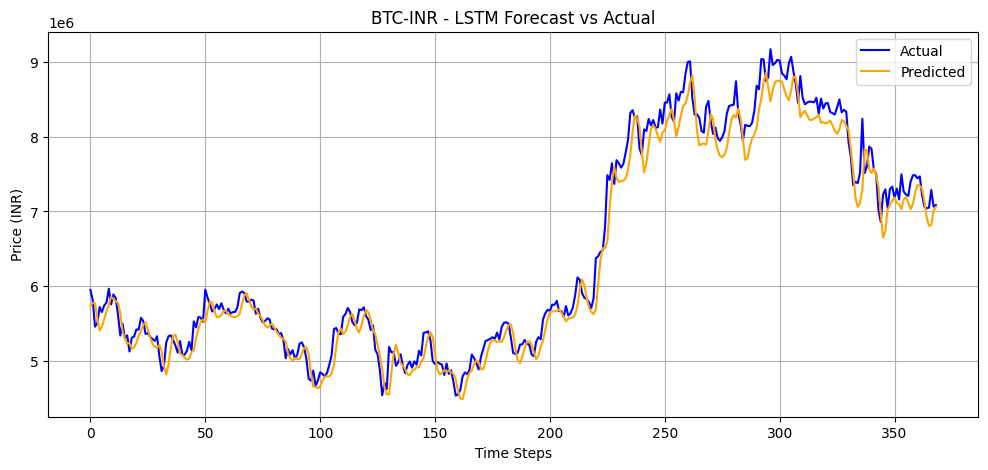

🕒 Forecasting next 365 days into the future...


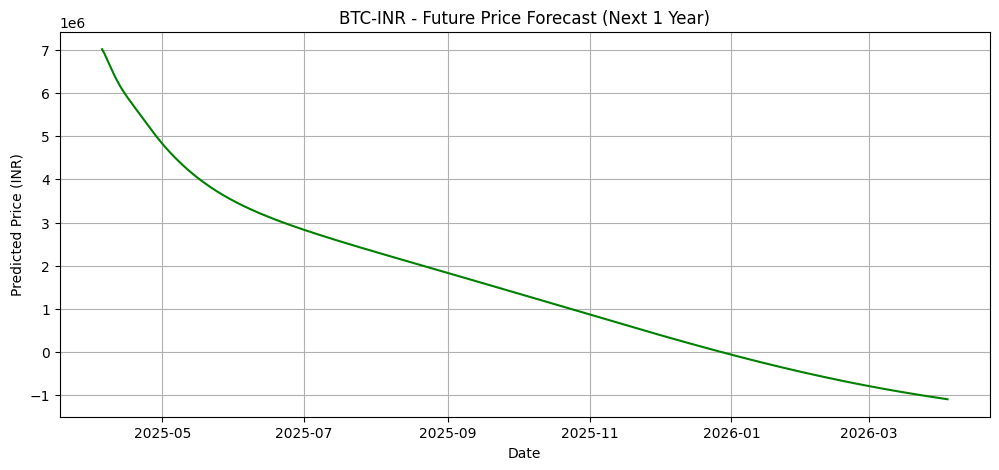

[*********************100%***********************]  1 of 1 completed


📆 Month-wise predicted prices for BTC-INR:

      Month  Predicted Price
0   2025-04     5.843426e+06
1   2025-05     4.088631e+06
2   2025-06     3.146811e+06
3   2025-07     2.575096e+06
4   2025-08     2.079016e+06
5   2025-09     1.602452e+06
6   2025-10     1.120930e+06
7   2025-11     6.384558e+05
8   2025-12     1.712286e+05
9   2026-01    -2.660508e+05
10  2026-02    -6.294976e+05
11  2026-03    -9.303941e+05
12  2026-04    -1.082246e+06

📈 Forecasting with LSTM for: ETH-INR


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step
📊 MAE: 7544.46, MSE: 101891247.16, RMSE: 10094.12


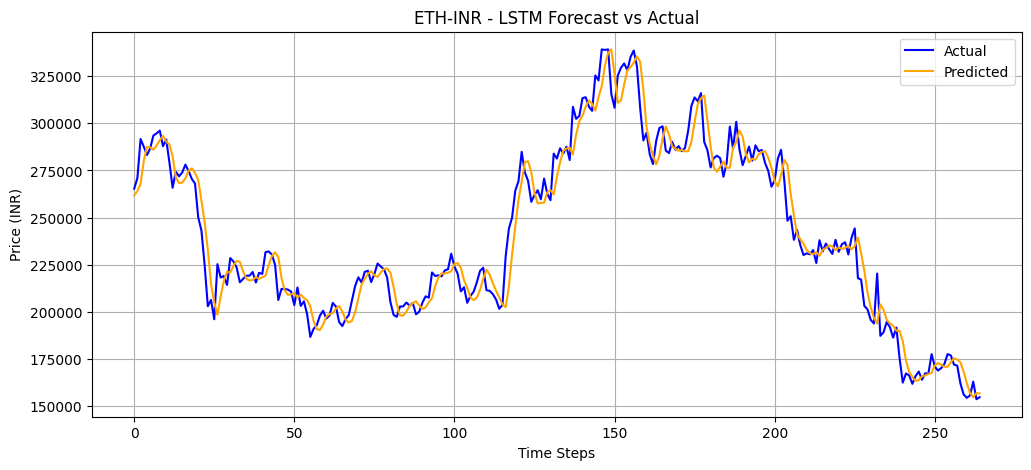

🕒 Forecasting next 365 days into the future...


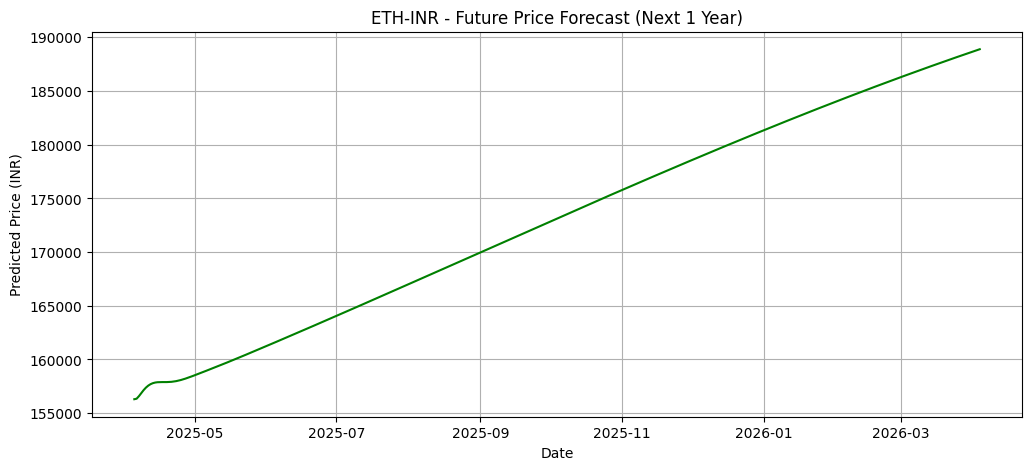


📆 Month-wise predicted prices for ETH-INR:

      Month  Predicted Price
0   2025-04    157703.203125
1   2025-05    159824.796875
2   2025-06    162606.203125
3   2025-07    165479.359375
4   2025-08    168440.406250
5   2025-09    171365.468750
6   2025-10    174273.171875
7   2025-11    177134.296875
8   2025-12    179919.593750
9   2026-01    182646.156250
10  2026-02    185121.765625
11  2026-03    187460.281250
12  2026-04    188785.859375

📈 Forecasting with LSTM for: LTC-INR


[*********************100%***********************]  1 of 1 completed


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step
📊 MAE: 272.58, MSE: 170556.63, RMSE: 412.99


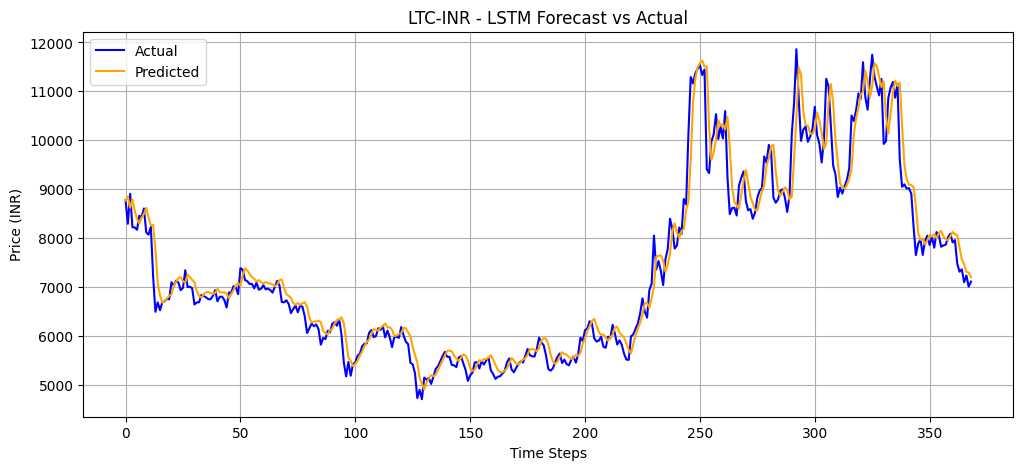

🕒 Forecasting next 365 days into the future...


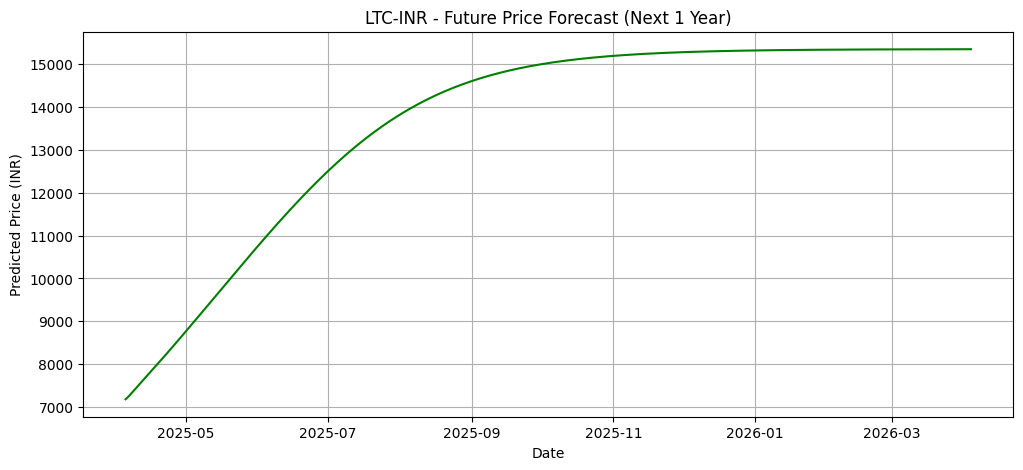


📆 Month-wise predicted prices for LTC-INR:

      Month  Predicted Price
0   2025-04      7930.331543
1   2025-05      9733.228516
2   2025-06     11627.096680
3   2025-07     13183.534180
4   2025-08     14239.120117
5   2025-09     14818.615234
6   2025-10     15106.276367
7   2025-11     15241.440430
8   2025-12     15302.471680
9   2026-01     15330.135742
10  2026-02     15341.932617
11  2026-03     15347.228516
12  2026-04     15348.967773


In [47]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

import datetime

# Parameters
sequence_length = 60  # Look-back window
epochs = 20
batch_size = 32
forecast_days = 365

def forecast_lstm(ticker):
    print(f"\n📈 Forecasting with LSTM for: {ticker}")

    # Load historical data
    df = yf.download(ticker, start='2015-01-01', end='2025-04-05')
    df = df[['Close']].dropna()
    dates = df.index

    # Normalize
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df)

    # Sequence generation
    X, y = [], []
    for i in range(sequence_length, len(scaled_data)):
        X.append(scaled_data[i - sequence_length:i, 0])
        y.append(scaled_data[i, 0])
    X, y = np.array(X), np.array(y)
    X = X.reshape((X.shape[0], X.shape[1], 1))

    # Train/test split
    split = int(0.9 * len(X))
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]

    # Build LSTM model
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)),
        LSTM(50),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

    # Predictions on test set
    y_pred = model.predict(X_test)
    y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1))
    y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Metrics
    mae = mean_absolute_error(y_test_inv, y_pred_inv)
    mse = mean_squared_error(y_test_inv, y_pred_inv)
    rmse = np.sqrt(mse)

    print(f"📊 MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}")

    # Plot actual vs predicted
    plt.figure(figsize=(12, 5))
    plt.plot(y_test_inv, label='Actual', color='blue')
    plt.plot(y_pred_inv, label='Predicted', color='orange')
    plt.title(f'{ticker} - LSTM Forecast vs Actual')
    plt.xlabel('Time Steps')
    plt.ylabel('Price (INR)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # ---- Forecasting next 365 days ----
    print("🕒 Forecasting next 365 days into the future...")

    last_sequence = scaled_data[-sequence_length:]  # Last 60 days
    future_preds = []

    for _ in range(forecast_days):
        input_seq = last_sequence.reshape((1, sequence_length, 1))
        pred = model.predict(input_seq, verbose=0)[0][0]
        future_preds.append(pred)
        last_sequence = np.append(last_sequence[1:], pred)

    # Inverse transform predictions
    future_preds_inv = scaler.inverse_transform(np.array(future_preds).reshape(-1, 1))

    # Generate future dates
    last_date = df.index[-1]
    future_dates = [last_date + datetime.timedelta(days=i) for i in range(1, forecast_days + 1)]
    future_df = pd.DataFrame({'Date': future_dates, 'Predicted Price': future_preds_inv.flatten()})

    # Plot future predictions
    plt.figure(figsize=(12, 5))
    plt.plot(future_df['Date'], future_df['Predicted Price'], color='green')
    plt.title(f'{ticker} - Future Price Forecast (Next 1 Year)')
    plt.xlabel('Date')
    plt.ylabel('Predicted Price (INR)')
    plt.grid(True)
    plt.show()

    # 📅 Month-wise summary
    future_df['Month'] = future_df['Date'].dt.to_period('M')
    monthly_avg = future_df.groupby('Month')['Predicted Price'].mean().reset_index()
    print(f"\n📆 Month-wise predicted prices for {ticker}:\n")
    print(monthly_avg)

# Run for each coin
forecast_lstm('BTC-INR')
forecast_lstm('ETH-INR')
forecast_lstm('LTC-INR')


[*********************100%***********************]  1 of 1 completed


📈 Forecasting with LSTM for: BTC-INR (Short-Term)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step
📊 MAE: 143737.48, MSE: 36512583774.38, RMSE: 191082.66


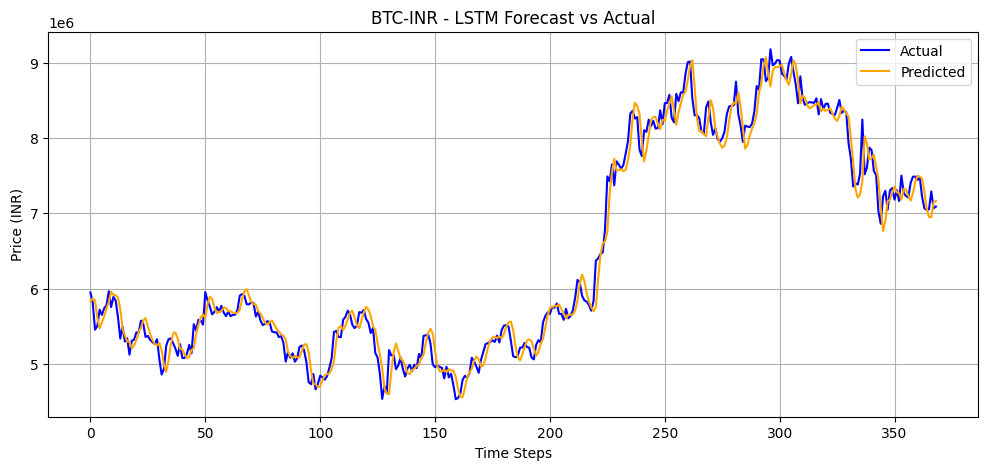

🕒 Forecasting next 30 days into the future...


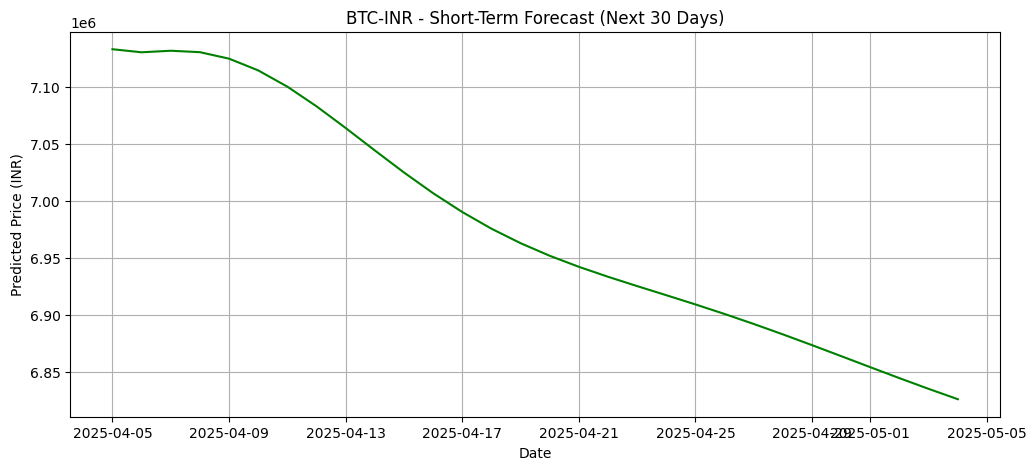

[*********************100%***********************]  1 of 1 completed


📆 Month-wise predicted prices for BTC-INR:

     Month  Predicted Price
0  2025-04        7000429.5
1  2025-05        6840238.0

📈 Forecasting with LSTM for: ETH-INR (Short-Term)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step
📊 MAE: 8621.63, MSE: 127053573.94, RMSE: 11271.80


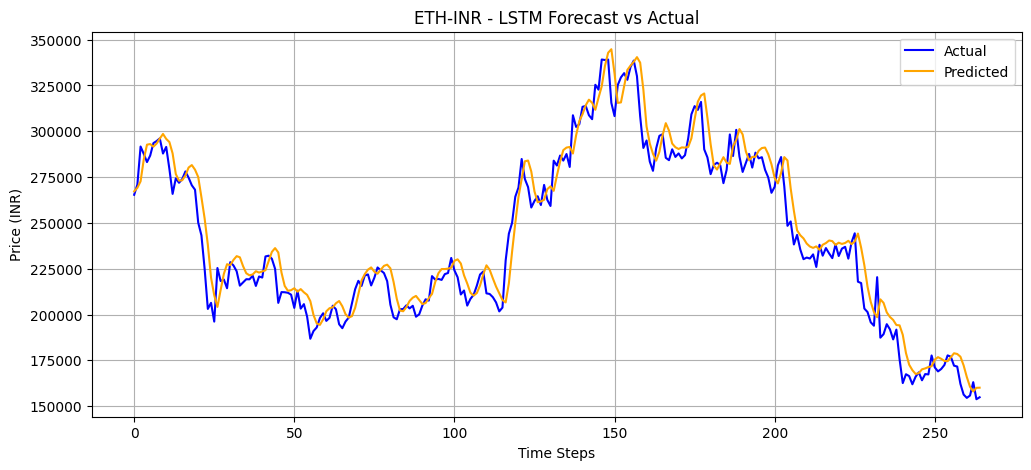

🕒 Forecasting next 30 days into the future...


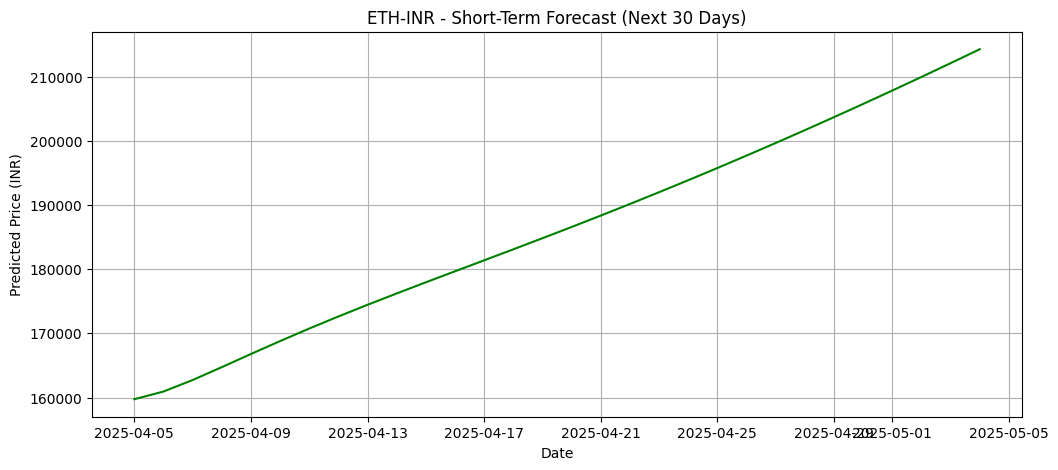

[*********************100%***********************]  1 of 1 completed


📆 Month-wise predicted prices for ETH-INR:

     Month  Predicted Price
0  2025-04     182299.06250
1  2025-05     211037.96875

📈 Forecasting with LSTM for: LTC-INR (Short-Term)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step
📊 MAE: 249.58, MSE: 148319.85, RMSE: 385.12


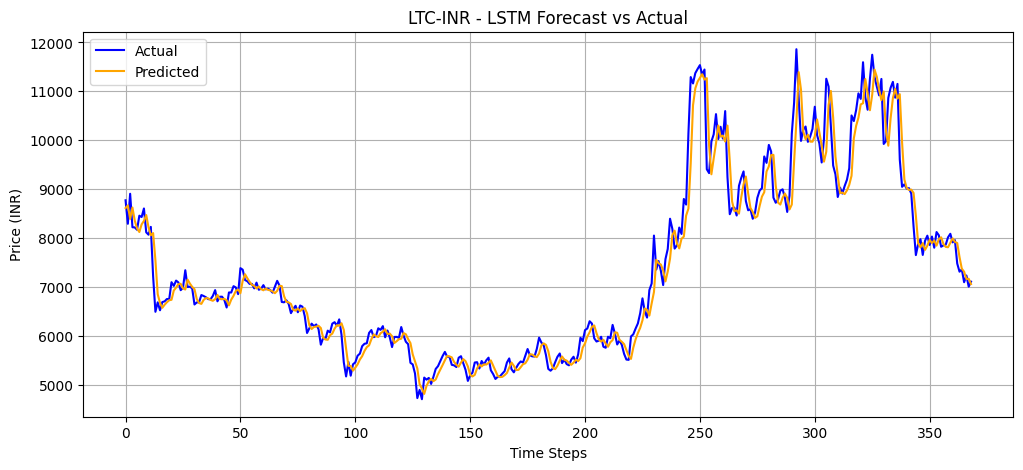

🕒 Forecasting next 30 days into the future...


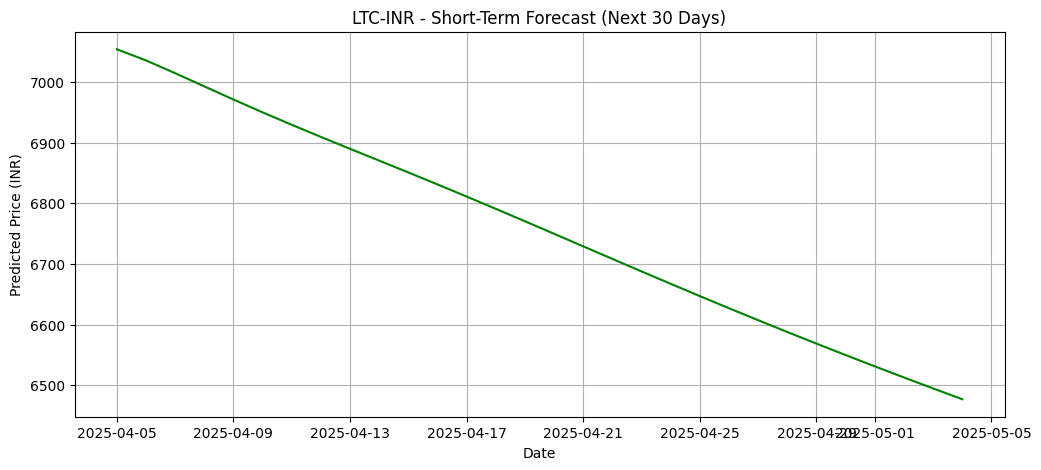


📆 Month-wise predicted prices for LTC-INR:

     Month  Predicted Price
0  2025-04      6800.042480
1  2025-05      6504.042969


In [50]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

import datetime

# Parameters
sequence_length = 60  # Look-back window
epochs = 20
batch_size = 32

def forecast_lstm(ticker, forecast_type='long'):
    print(f"\n📈 Forecasting with LSTM for: {ticker} ({'Short-Term' if forecast_type=='short' else 'Long-Term'})")

    # Load historical data
    df = yf.download(ticker, start='2015-01-01', end='2025-04-05')
    df = df[['Close']].dropna()
    dates = df.index

    # Normalize
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df)

    # Sequence generation
    X, y = [], []
    for i in range(sequence_length, len(scaled_data)):
        X.append(scaled_data[i - sequence_length:i, 0])
        y.append(scaled_data[i, 0])
    X, y = np.array(X), np.array(y)
    X = X.reshape((X.shape[0], X.shape[1], 1))

    # Train/test split
    split = int(0.9 * len(X))
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]

    # Build LSTM model
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)),
        LSTM(50),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

    # Predictions on test set
    y_pred = model.predict(X_test)
    y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1))
    y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Metrics
    mae = mean_absolute_error(y_test_inv, y_pred_inv)
    mse = mean_squared_error(y_test_inv, y_pred_inv)
    rmse = np.sqrt(mse)

    print(f"📊 MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}")

    # Plot actual vs predicted
    plt.figure(figsize=(12, 5))
    plt.plot(y_test_inv, label='Actual', color='blue')
    plt.plot(y_pred_inv, label='Predicted', color='orange')
    plt.title(f'{ticker} - LSTM Forecast vs Actual')
    plt.xlabel('Time Steps')
    plt.ylabel('Price (INR)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Forecast period based on type
    forecast_days = 30 if forecast_type == 'short' else 365
    print(f"🕒 Forecasting next {forecast_days} days into the future...")

    # Generate future predictions
    last_sequence = scaled_data[-sequence_length:]
    future_preds = []

    for _ in range(forecast_days):
        input_seq = last_sequence.reshape((1, sequence_length, 1))
        pred = model.predict(input_seq, verbose=0)[0][0]
        future_preds.append(pred)
        last_sequence = np.append(last_sequence[1:], pred)

    # Inverse transform
    future_preds_inv = scaler.inverse_transform(np.array(future_preds).reshape(-1, 1))

    # Dates
    last_date = df.index[-1]
    future_dates = [last_date + datetime.timedelta(days=i) for i in range(1, forecast_days + 1)]
    future_df = pd.DataFrame({'Date': future_dates, 'Predicted Price': future_preds_inv.flatten()})

    # Plot future forecast
    plt.figure(figsize=(12, 5))
    plt.plot(future_df['Date'], future_df['Predicted Price'], color='green')
    plt.title(f'{ticker} - {"Short-Term" if forecast_type=="short" else "Long-Term"} Forecast (Next {forecast_days} Days)')
    plt.xlabel('Date')
    plt.ylabel('Predicted Price (INR)')
    plt.grid(True)
    plt.show()

    # Monthly average summary
    future_df['Month'] = future_df['Date'].dt.to_period('M')
    monthly_avg = future_df.groupby('Month')['Predicted Price'].mean().reset_index()
    print(f"\n📆 Month-wise predicted prices for {ticker}:\n")
    print(monthly_avg)

# 🔄 Run for each coin and forecast type
forecast_lstm('BTC-INR', forecast_type='short')  # or 'long'
forecast_lstm('ETH-INR', forecast_type='short')
forecast_lstm('LTC-INR', forecast_type='short')
